In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
def format_output(data):
    y1 = data.pop("Y1")
    y1 = np.array(y1)
    y2 = data.pop("Y2")
    y2 = np.array(y2)
    return y1, y2

In [10]:
df = pd.read_excel("ENB2012_data.xlsx")

In [11]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [12]:
df.shape

(768, 10)

In [13]:
train, test = train_test_split(df, test_size=0.2)

In [14]:
print(train.shape, test.shape)

(614, 10) (154, 10)


In [15]:
X_train = train.iloc[:, :-2]
X_test = test.iloc[:, :-2]

y_train = format_output(train)
y_test = format_output(test)

In [16]:
X_train.head()

,X1,X2,X3,X4,X5,X6,X7,X8
404,0.76,661.5,416.5,122.5,7.0,2,0.25,3
90,0.64,784.0,343.0,220.5,3.5,4,0.10,1
600,0.74,686.0,245.0,220.5,3.5,2,0.40,2
115,0.79,637.0,343.0,147.0,7.0,5,0.10,2
28,0.71,710.5,269.5,220.5,3.5,2,0.00,0


In [17]:
X_test.head()

,X1,X2,X3,X4,X5,X6,X7,X8
614,0.66,759.5,318.5,220.50,3.5,4,0.4,2
263,0.76,661.5,416.5,122.50,7.0,5,0.1,5
749,0.71,710.5,269.5,220.50,3.5,3,0.4,5
691,0.79,637.0,343.0,147.00,7.0,5,0.4,4
242,0.98,514.5,294.0,110.25,7.0,4,0.1,5


In [18]:
y_train

(array([35.99 , 15.42 , 14.54 , 36.03 ,  6.37 , 11.43 , 25.38 , 35.4  ,
        11.45 , 15.32 , 11.42 , 12.16 , 15.34 , 17.52 , 17.05 , 14.54 ,
        21.46 , 12.28 , 11.11 , 15.34 , 39.89 , 17.14 , 17.23 , 12.95 ,
        24.63 , 11.34 , 11.53 , 15.08 , 32.84 , 25.74 , 35.69 , 13.86 ,
        36.43 , 33.16 , 15.98 , 32.75 , 28.58 , 12.74 , 24.37 , 12.27 ,
        39.97 , 39.84 , 33.28 , 24.11 , 35.56 , 20.84 , 35.73 , 22.79 ,
        25.41 , 28.86 , 32.33 , 15.12 , 16.44 , 12.29 , 30.   , 12.12 ,
        23.93 , 40.43 , 14.52 , 29.52 , 42.62 , 24.96 , 13.18 ,  6.4  ,
        13.   , 29.05 , 14.7  , 28.95 , 35.05 , 29.03 , 12.47 , 17.5  ,
        41.96 , 13.   , 12.92 , 12.45 , 36.71 , 32.72 , 32.73 , 14.41 ,
         7.18 , 29.47 , 14.21 , 15.23 , 29.01 , 32.52 , 32.39 , 15.16 ,
        11.46 , 28.67 , 11.16 , 15.36 , 25.27 , 13.   , 24.59 , 28.05 ,
        10.35 , 12.95 , 35.94 , 10.15 , 32.09 , 11.11 , 29.91 , 24.94 ,
        12.73 , 12.1  , 31.89 , 23.67 , 14.22 , 26.44 , 19.06 , 

In [19]:
y_test

(array([15.09, 33.27, 12.63, 42.96, 24.03, 29.54, 32.31, 12.73, 12.43,
        32.85, 35.01, 32.74, 14.28, 11.43, 12.84, 26.89, 39.32, 14.32,
        10.71, 36.57, 24.24, 36.95, 10.55, 28.67, 32.46, 14.56, 19.95,
        11.33, 24.23, 12.93, 17.02, 32.15, 12.74, 32.06, 23.87, 36.59,
        15.3 , 12.31, 25.37, 12.43, 12.28, 41.4 , 38.89, 29.87, 10.66,
        15.55, 13.86, 12.57, 35.69, 27.27, 14.42, 28.57, 11.67, 39.04,
        19.68, 13.91, 24.7 , 18.19, 14.51, 12.25, 42.77, 32.69, 14.17,
        10.78, 36.86, 29.9 , 14.4 ,  6.07, 28.6 , 36.97, 35.65, 14.6 ,
        28.56, 12.27, 10.68, 40.15, 16.44, 23.54, 13.69, 29.71, 28.15,
        14.92, 32.96, 15.23, 31.64, 24.35, 11.69, 10.54, 29.67, 18.31,
        32.67, 10.32, 36.9 , 17.88, 33.27, 31.63, 14.5 , 14.53, 22.93,
        36.45, 12.42, 25.66, 14.45, 32.94, 42.5 , 32.67, 32.82, 42.49,
         6.85, 15.16, 12.02, 15.55, 32.33, 29.08, 16.54, 15.12, 11.07,
        15.36, 22.89, 12.71, 28.15, 28.75, 36.77, 26.33, 12.57, 29.83,
      

In [20]:
scaler = StandardScaler()

In [21]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
print(type(X_train))
X_train

<class 'numpy.ndarray'>


array([[-0.02531891, -0.13133188,  2.27159763, ..., -1.36628484,
         0.117254  ,  0.14340643],
       [-1.15592352,  1.2494519 ,  0.56023451, ...,  0.41860642,
        -1.01354112, -1.16106096],
       [-0.21375302,  0.14482488, -1.72158299, ..., -1.36628484,
         1.24804912, -0.50882727],
       ...,
       [-0.68483827,  0.69713839, -0.58067424, ...,  0.41860642,
         0.117254  ,  0.79564013],
       [ 0.91685159, -0.95980214, -0.58067424, ...,  1.31105205,
         0.117254  ,  1.44787383],
       [-0.49640417,  0.42098163, -1.15112861, ...,  1.31105205,
        -1.01354112, -0.50882727]])

In [23]:
print(type(X_test))
X_test

<class 'numpy.ndarray'>


array([[-0.96748942,  0.97329514, -0.01021987, ...,  0.41860642,
         1.24804912, -0.50882727],
       [-0.02531891, -0.13133188,  2.27159763, ...,  1.31105205,
        -1.01354112,  1.44787383],
       [-0.49640417,  0.42098163, -1.15112861, ..., -0.47383921,
         1.24804912,  1.44787383],
       ...,
       [-1.15592352,  1.2494519 ,  0.56023451, ...,  1.31105205,
        -1.76740454, -1.81329466],
       [-0.02531891, -0.13133188,  2.27159763, ..., -0.47383921,
        -1.01354112, -1.16106096],
       [ 0.91685159, -0.95980214, -0.58067424, ...,  1.31105205,
        -1.01354112,  1.44787383]])

In [24]:
X_train.shape

(614, 8)

In [25]:
# Model

In [26]:
input_layer = tf.keras.layers.Input(shape=(8,))
first_dense = tf.keras.layers.Dense("128", activation="relu")(input_layer)
second_dense = tf.keras.layers.Dense("128", activation="relu")(first_dense)

y1_output = tf.keras.layers.Dense("1", name="y1_output")(second_dense)
third_dense = tf.keras.layers.Dense("64", activation="relu")(second_dense)
y2_output = tf.keras.layers.Dense("1", name="y2_output")(third_dense)

In [27]:
# Define the model with the input layer and a list of output layers
model = tf.keras.Model(inputs=input_layer, outputs=[y1_output, y2_output])

In [28]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          1152        input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 128)          16512       dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 64)           8256        dense_1[0][0]                    
______________________________________________________________________________________________

In [29]:
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.001),
                                          loss={"y1_output" : "mse", "y2_output" : "mse"},
                                          metrics={"y1_output" : tf.keras.metrics.RootMeanSquaredError(),
                                          "y2_output" : tf.keras.metrics.RootMeanSquaredError()})

In [30]:
from tensorflow.python.keras.utils.vis_utils import plot_model

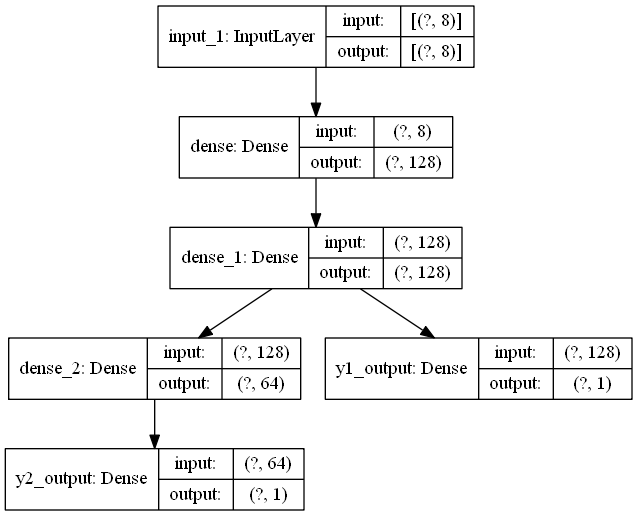

In [31]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file="model.png")

In [32]:
history = model.fit(X_train, y_train, epochs=2000, batch_size=10, validation_data=(X_test, y_test))

Train on 614 samples, validate on 154 samples
Epoch 1/2000
614/614 [==============================] - 1s 882us/sample - loss: 235.8785 - y1_output_loss: 109.4705 - y2_output_loss: 124.8017 - y1_output_root_mean_squared_error: 10.5136 - y2_output_root_mean_squared_error: 11.1956 - val_loss: 400.1715 - val_y1_output_loss: 86.0907 - val_y2_output_loss: 320.0029 - val_y1_output_root_mean_squared_error: 9.2386 - val_y2_output_root_mean_squared_error: 17.7431
Epoch 2/2000
614/614 [==============================] - 0s 121us/sample - loss: 38.9696 - y1_output_loss: 14.2071 - y2_output_loss: 24.5441 - y1_output_root_mean_squared_error: 3.7777 - y2_output_root_mean_squared_error: 4.9698 - val_loss: 53.2901 - val_y1_output_loss: 12.5964 - val_y2_output_loss: 40.3446 - val_y1_output_root_mean_squared_error: 3.5689 - val_y2_output_root_mean_squared_error: 6.3681
Epoch 3/2000
614/614 [==============================] - 0s 121us/sample - loss: 27.7534 - y1_output_loss: 10.3744 - y2_output_loss: 17.414

In [33]:
loss, Y1_loss, Y2_loss, Y1_rmse, Y2_rmse = model.evaluate(x=X_test, y=y_test)
print(f"Loss = {loss}, Y1_loss = {Y1_loss}, Y2_loss = {Y2_loss}, Y1_MSE = {Y1_rmse}, Y2_MSE = {Y2_rmse}")

154/154 [==============================] - 0s 45us/sample - loss: 0.5879 - y1_output_loss: 0.1883 - y2_output_loss: 0.3931 - y1_output_root_mean_squared_error: 0.4376 - y2_output_root_mean_squared_error: 0.6297
Loss = 0.5879488192595445, Y1_loss = 0.18829406797885895, Y2_loss = 0.39305365085601807, Y1_MSE = 0.4375579357147217, Y2_MSE = 0.6296760439872742


In [52]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-bright")

%matplotlib inline

In [53]:
def plot_diff(y_true, y_pred, title=""):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.axis("equal")
    plt.axis("square")
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()

In [56]:
def plot_metrics(metrics_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metrics_name], color="blue", label=metrics_name)
    plt.plot(history.history["val_" +metrics_name], color="green", label="val_" + metrics_name)
    plt.show()

In [57]:
y_pred = model.predict(X_test)

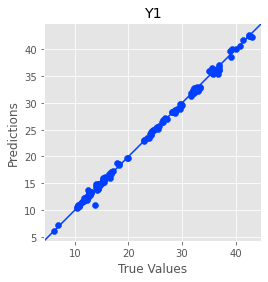

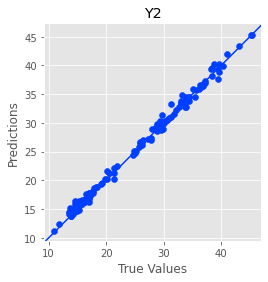

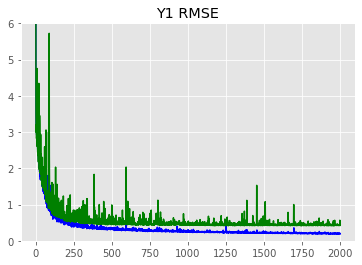

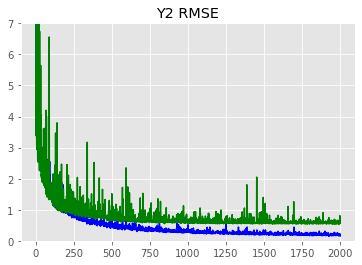

In [59]:
plot_diff(y_test[0], y_pred[0], title="Y1")
plot_diff(y_test[1], y_pred[1], title="Y2")

plot_metrics(metrics_name="y1_output_root_mean_squared_error", title="Y1 RMSE", ylim=6)
plot_metrics(metrics_name="y2_output_root_mean_squared_error", title="Y2 RMSE", ylim=7)